# Feature Tuning of Machine Learning Models

## Context

Concrete is the most important material in civil engineering. The concrete
compressive strength is a highly nonlinear function of age and ingredients.
These ingredients include cement, blast furnace slag, fly ash, water,
superplasticizer, coarse aggregate, and fine aggregate.

## Objective

Modeling of strength of high performance concrete using Machine Learning

## Attribute Information

 - Cement : measured in kg in a m3 mixture
 - Blast : measured in kg in a m3 mixture
 - Fly ash : measured in kg in a m3 mixture
 - Water : measured in kg in a m3 mixture
 - Superplasticizer : measured in kg in a m3 mixture
 - Coarse Aggregate : measured in kg in a m3 mixture
 - Fine Aggregate : measured in kg in a m3 mixture
 - Age : day (1~365)
 - Concrete compressive strength measured in MPa

## Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
sns.set(style='darkgrid')
%matplotlib inline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
from sklearn.svm import SVR
from sklearn.ensemble import (RandomForestRegressor, GradientBoostingRegressor,AdaBoostRegressor,BaggingRegressor)

In [3]:
#Load the dataset
df = pd.read_csv('concrete.csv')

### Exporatory Data Analysis

##### 1 (a) Univariate analysis – data types and description of the independent attributes which should include (name, meaning, range of values observed, central values (mean and median), standard deviation and quartiles, analysis ofthe body of distributions / tails, missing values, outliers.

Eye balling the data first

In [4]:
# viewing dataset
df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [5]:
#checking the shape- no. of rows and columns
df.shape

(1030, 9)

In [6]:
#checking name of columns
df.columns

Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age', 'strength'],
      dtype='object')

In [7]:
#checking datatypes of each column
pd.DataFrame(df.dtypes, columns =['Datatype'])

,Datatype
cement,float64
slag,float64
ash,float64
water,float64
superplastic,float64
coarseagg,float64
fineagg,float64
age,int64
strength,float64


In [8]:
#cheking null/missing values
pd.DataFrame(df.isnull().sum(), columns= ['Missing values'])

,Missing values
cement,0
slag,0
ash,0
water,0
superplastic,0
coarseagg,0
fineagg,0
age,0
strength,0


In [9]:
#checking if there is any duplicate values
df.duplicated().sum()

25

In [10]:
#dropping duplicate values
df.drop_duplicates(inplace = True)

In [11]:
#Again checking the shape, it has changed now
df.shape

(1005, 9)

In [12]:
#Checking mean, standard deviation , quartiles
df.describe([.01,.1,.2,.5,.75,.99]).T

,count,mean,std,min,1%,10%,20%,50%,75%,99%,max
cement,1005.0,278.631343,104.344261,102.00,116.0000,153.040,173.50,265.0,349.00,531.3000,540.0
slag,1005.0,72.043483,86.170807,0.00,0.0000,0.000,0.00,20.0,142.50,290.2000,359.4
ash,1005.0,55.536318,64.207969,0.00,0.0000,0.000,0.00,0.0,118.30,185.2880,200.1
water,1005.0,182.075323,21.339334,121.80,127.0120,155.600,162.00,185.7,192.90,228.0000,247.0
superplastic,1005.0,6.033234,5.919967,0.00,0.0000,0.000,0.00,6.1,10.00,23.4000,32.2
coarseagg,1005.0,974.376816,77.579667,801.00,817.9040,858.880,916.48,968.0,1031.00,1125.0000,1145.0
fineagg,1005.0,772.688259,80.340435,594.00,594.0000,659.940,707.90,780.0,822.20,943.1000,992.6
age,1005.0,45.856716,63.734692,1.00,3.0000,3.000,7.00,28.0,56.00,365.0000,365.0
strength,1005.0,35.250378,16.284815,2.33,6.8808,13.948,20.73,33.8,44.87,75.4796,82.6


In [13]:
#Range of values
col_val = df.columns
for i in col_val:
    print('Min value of {} is {} and Max is {} and Range is {}'.format(i,df[i].min(),df[i].max(), df[i].max() - df[i].min()))
    

Min value of cement is 102.0 and Max is 540.0 and Range is 438.0
Min value of slag is 0.0 and Max is 359.4 and Range is 359.4
Min value of ash is 0.0 and Max is 200.1 and Range is 200.1
Min value of water is 121.8 and Max is 247.0 and Range is 125.2
Min value of superplastic is 0.0 and Max is 32.2 and Range is 32.2
Min value of coarseagg is 801.0 and Max is 1145.0 and Range is 344.0
Min value of fineagg is 594.0 and Max is 992.6 and Range is 398.6
Min value of age is 1 and Max is 365 and Range is 364
Min value of strength is 2.33 and Max is 82.6 and Range is 80.27


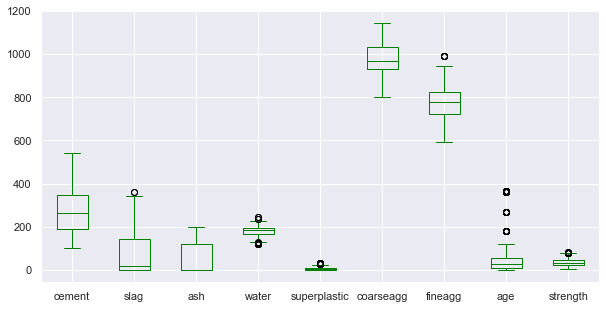

In [14]:
#checking for outliers
df1 = df.copy(deep = True)
df1.boxplot(figsize=(10,5), color= 'green')

Above boxplot shows outliers in variables slag, water, superplastic, fineagg, age and strength.

In [15]:
#Number of outliers
for i in col_val:
    print('No. of outliers in {} is {}'.format(i, df1[((df1[i]-df1[i].mean())/df1[i].std()).abs() > 3][i].count()))

No. of outliers in cement is 0
No. of outliers in slag is 4
No. of outliers in ash is 0
No. of outliers in water is 2
No. of outliers in superplastic is 10
No. of outliers in coarseagg is 0
No. of outliers in fineagg is 0
No. of outliers in age is 33
No. of outliers in strength is 0


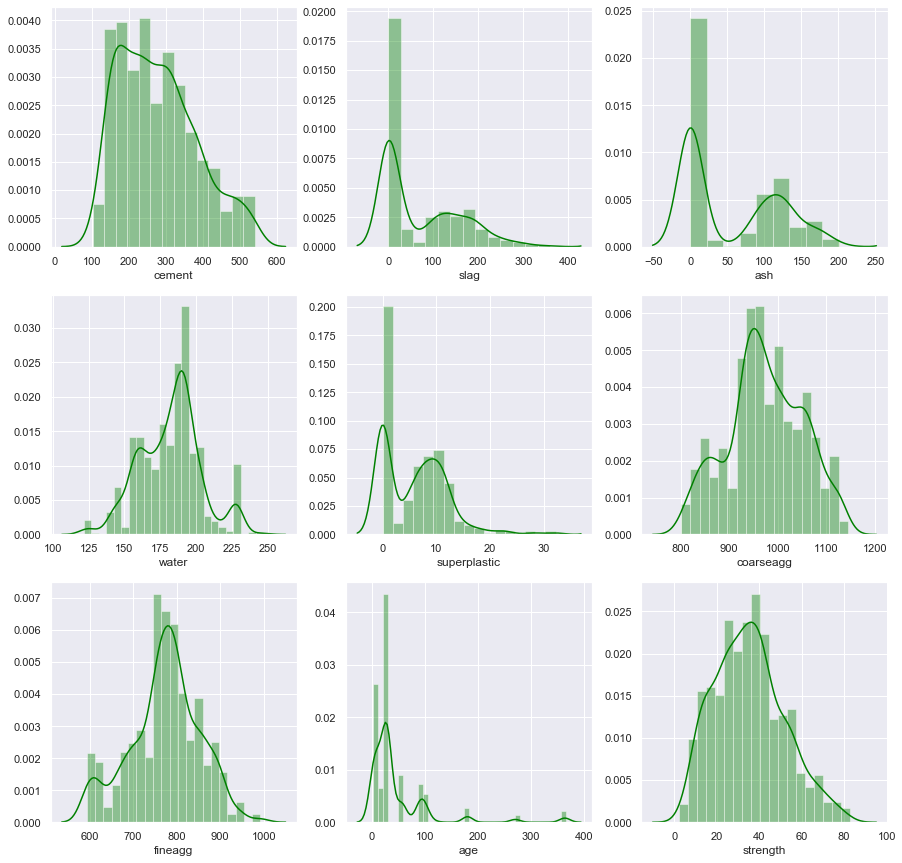

In [16]:
#Checking distribultion using distplot

Cols = df1.columns
pos = 1
plt.figure(figsize=(15,15))
for i in Cols:
    plt.subplot(3,3,pos)
    sns.distplot(df1[i],hist = True, color= 'green')
    pos +=1

Here we can see few columns follow normal and bimodal distribution and few have very high peaks which indicates outliers in data. Also, few columns are right skewed.

##### 1 (b) Multivariate analysis (5 marks) Bi-variate analysis between the predictor variables and between the predictor variables and target column. Comment on your findings in terms of their relationship and degree of relation if any. Presence of leverage points. Visualize the analysis using boxplots and pair plots, histograms or density curves. Select the most appropriate attributes

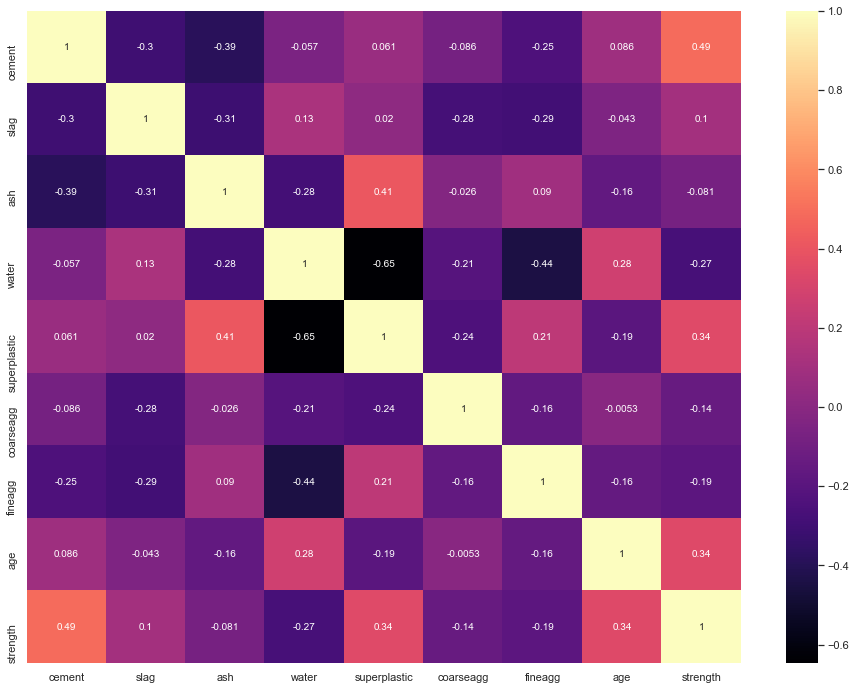

In [17]:
#chekcing correlation between independent varaibles
cor = df1.corr()
plt.figure(figsize=(16,12))
sns.heatmap(cor, xticklabels=cor.columns, yticklabels= cor.columns,annot= True,cmap='magma');

Here we cannot see any correlation between attributes which is good.
We can observe positive correlation between cement , age and superplasticizer with strength.
There is also strong negative correlation between Superplasticizer and water.

These observations are necsessary to understand the data in detail as they give an idea about how a variable is affecting the order

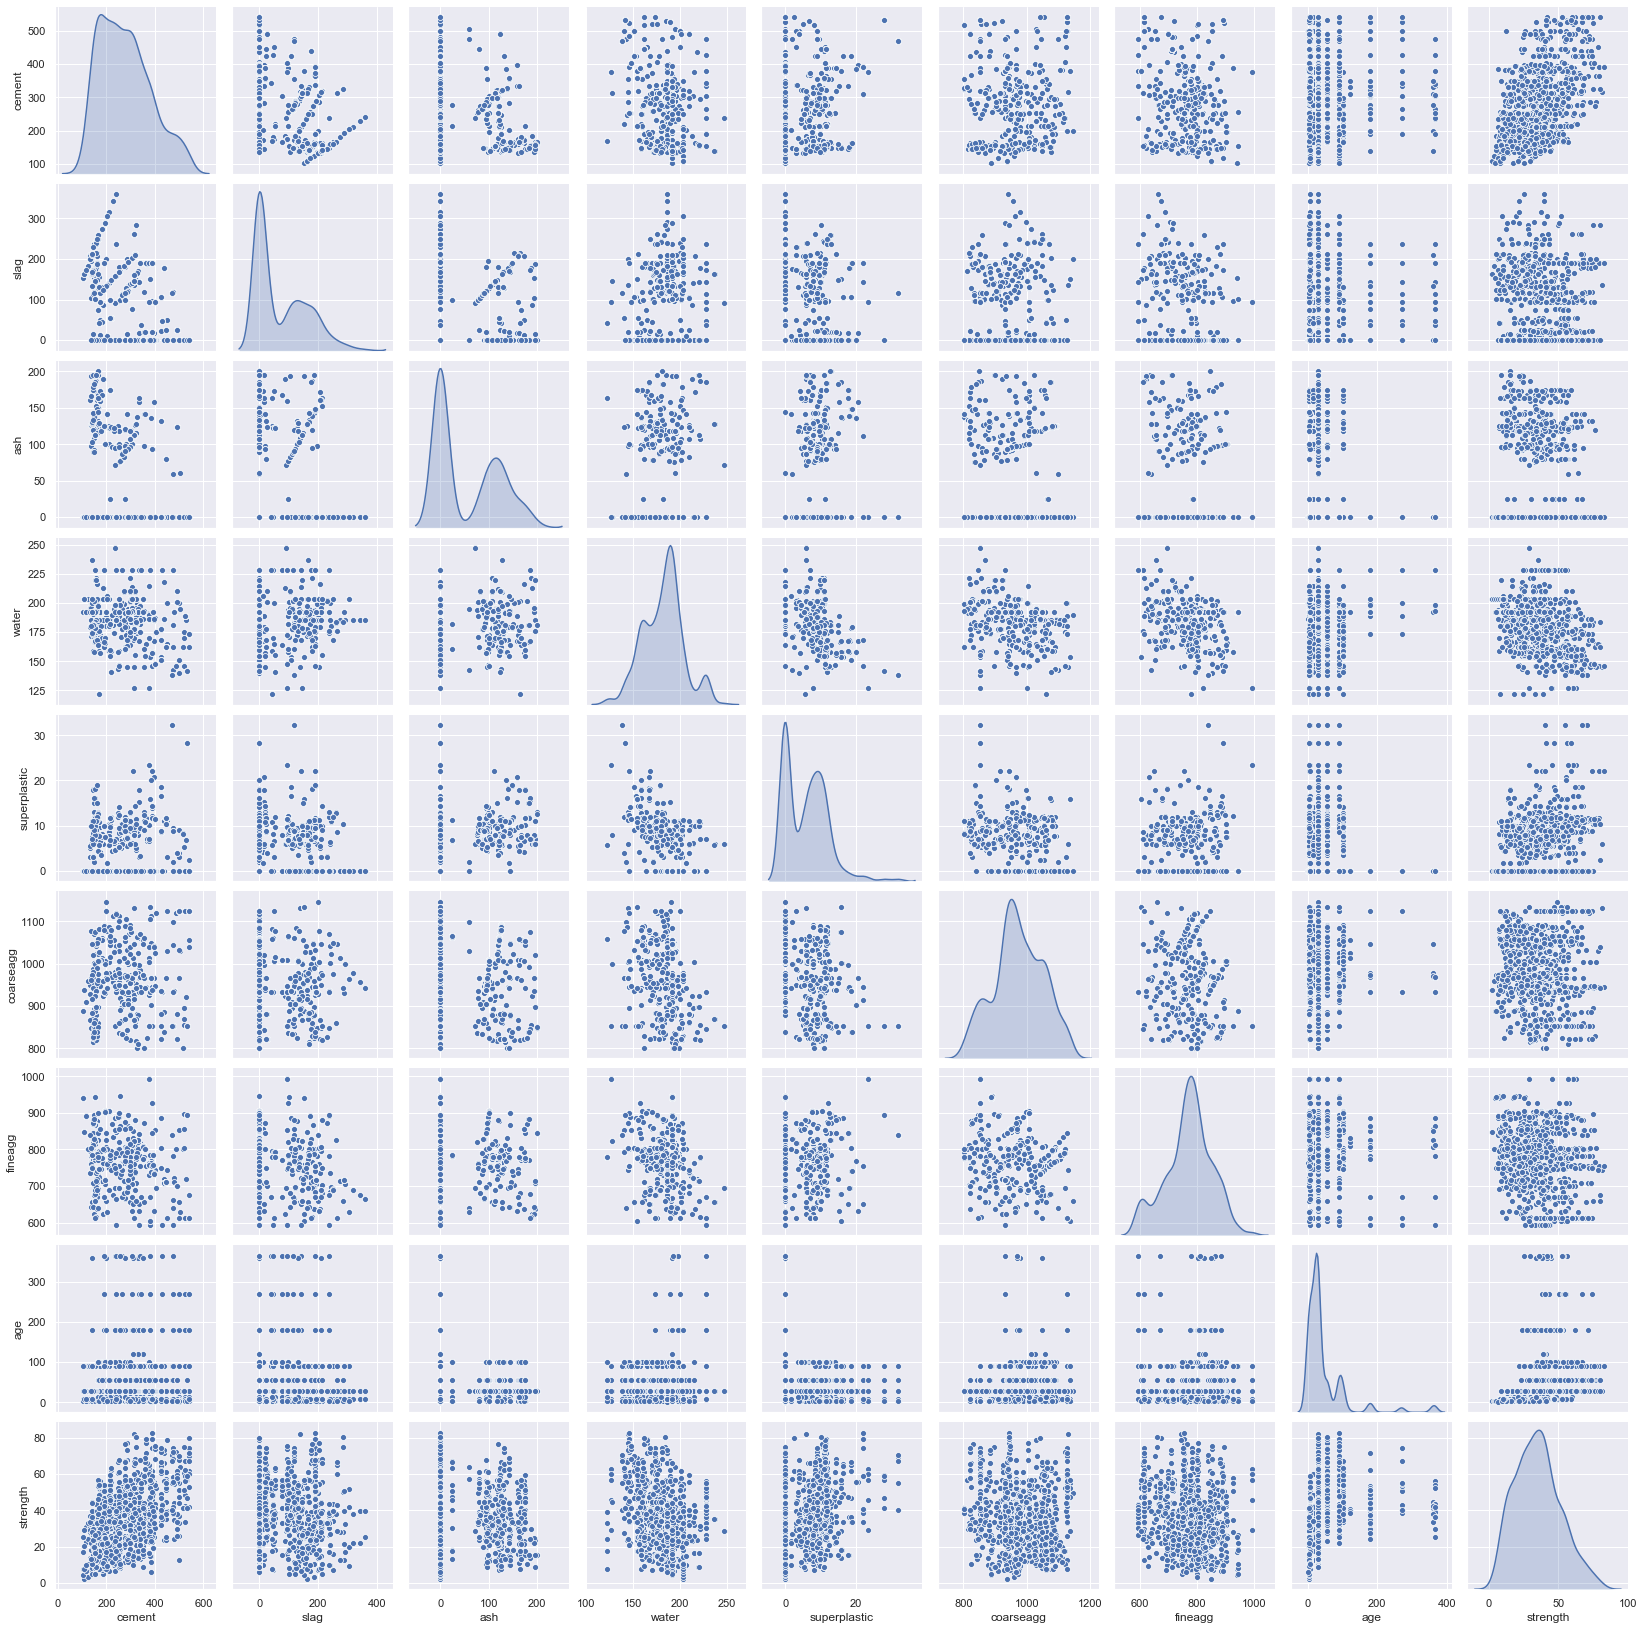

In [55]:
#Pairplot
sns.pairplot(df1,diag_kind='kde');

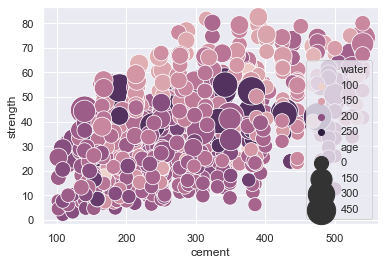

In [18]:
#checking corelation of independent varaible with target variable

sns.scatterplot(data = df1 , y="strength", x="cement", hue="water",size='age',sizes= (200,800));

- We can observe , strength increases as the amount of cement increases.
- strength also increases with age.
- cement with less age require more cement to get strength.
- cement with more age require more water.
- strength increases when less water is used.


##### 1(c) Pick one strategy to address the presence outliers and missing values and perform necessary imputation.

Since there are no missing values so no need to treat it. We have outliers lets do the imputation for them.

In [19]:
#Lets impute outliers with Median
for i in col_val:
    Q1 = df1[i].quantile(0.25)
    Q3 = df1[i].quantile(0.75)
    IQR = Q3 - Q1
    
    low = Q1 - 1.5*IQR
    high = Q3 + 1.5*IQR
    df1.loc[(df1[i] < low) | (df1[i] > high),i] = df1[i].median()

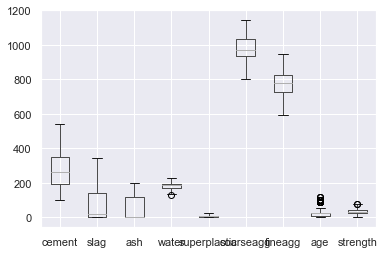

In [20]:
df1.boxplot()

In [21]:
#Number of outliers
for i in col_val:
    print('No. of outliers in {} is {}'.format(i, df1[((df1[i]-df1[i].mean())/df1[i].std()).abs() > 3][i].count()))

No. of outliers in cement is 0
No. of outliers in slag is 2
No. of outliers in ash is 0
No. of outliers in water is 0
No. of outliers in superplastic is 12
No. of outliers in coarseagg is 0
No. of outliers in fineagg is 0
No. of outliers in age is 3
No. of outliers in strength is 0


### Feature engineering Techniques

##### 2 (a) Identify opportunities (if any) to create a composite feature, drop a feature etc. 

In [22]:
df1.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28.0,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14.0,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28.0,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28.0,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28.0,18.29


In [23]:
# We can combine coarseagg and fineagg to one single column aggregate
# df1['aggregate'] = df1['coarseagg'] + df1['fineagg']
df1.head()


,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28.0,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14.0,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28.0,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28.0,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28.0,18.29


In [24]:
# df1.drop(['coarseagg','fineagg'],axis =1, inplace = True)

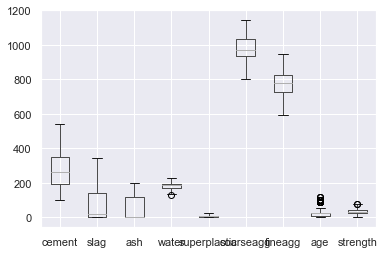

In [25]:
df1.boxplot();

In [26]:
#Number of outliers
col_val_new = df1.columns
for i in col_val_new:
    print('No. of outliers in {} is {}'.format(i, df1[((df1[i]-df1[i].mean())/df1[i].std()).abs() > 3][i].count()))

No. of outliers in cement is 0
No. of outliers in slag is 2
No. of outliers in ash is 0
No. of outliers in water is 0
No. of outliers in superplastic is 12
No. of outliers in coarseagg is 0
No. of outliers in fineagg is 0
No. of outliers in age is 3
No. of outliers in strength is 0


In [27]:
df1.columns

Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age', 'strength'],
      dtype='object')

##### 2(b) Decide on complexity of the model, should it be simple linear model in terms of parameters or would a quadratic or higherdegree help.


If we observe pairplot carefully, we can see independent variables does not show any specific relation with each other. Maximum of them spread like a cloud. 
Also, if we observe relation of strength with other independent variables , it forms linear relationship only with cement. But with other varaibles there is no specific trend. So , I don't think Simple linear model would work in this scenario.

##### 2(c) Explore for gaussians. If data is likely to be a mix of gaussians, explore individual clusters and present your findings in terms of the independent attributes and their suitability to predict strength.

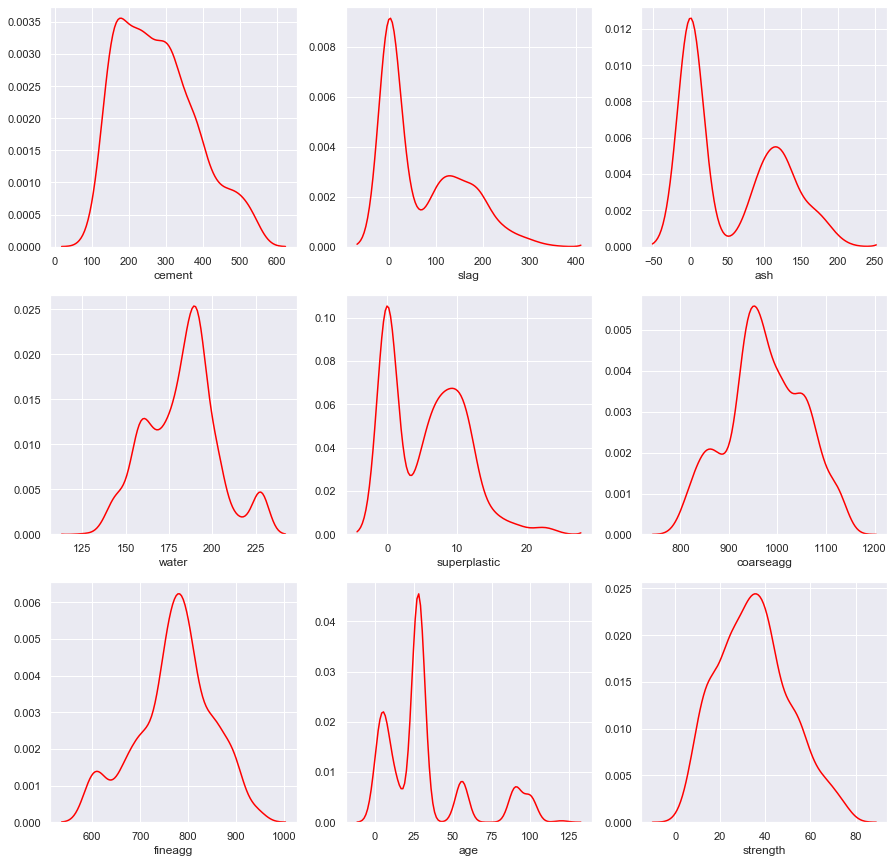

In [28]:
#checking guassians
# c = ['cement', 'slag', 'ash', 'water', 'superplastic', 'age', 'strength']
c = df1.columns
pos = 1
plt.figure(figsize=(15,15))
for i in c:
    plt.subplot(3,3,pos)
    sns.distplot(df1[i], hist = False, color = 'red')
    pos +=1

- cement is following almost normal distribution.
- slag had two gaussians and right skewed.
- ash had two guassians and right skewed.
- water has three  gausians and slightly left skewed.
- superplastic has two guassians and right skewed.
- age has multiple guassians and right skewed.
- strength is following proper normal distribution.
- aggregate is slight left skewed.

### Create the model

##### 3(a) Obtain feature importance for the individual features and present your findings

In [29]:
#Scaling the features
df1_scaled = df1.apply(zscore)
df1_scaled = pd.DataFrame(df1_scaled, columns = df1.columns)

#Splitting dataset into independent and dependent
X = df1_scaled.drop(['strength'],axis=1)
y = df1_scaled['strength']

#Splitting dataset into training and test set in the ratio of 70:30 
X_train, X_test, y_train , y_test = train_test_split(X,y,test_size=0.30, random_state=1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((703, 8), (302, 8), (703,), (302,))

In [30]:
#Creating Decision Tree Regressor model
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor(random_state=1)
dt_model.fit(X_train,y_train)

DecisionTreeRegressor(random_state=1)

In [31]:
# print('Feature importances: \n',pd.DataFrame(dt_model.feature_importances_,columns=['Imp'],index=X_train.columns))
a = pd.DataFrame(dt_model.feature_importances_, columns= ['importance'],index = X_train.columns).sort_values('importance',ascending= False)
a.index.name = 'Features'
a['cummulative_importance'] = np.cumsum(a.importance)
most_imp = a[a['cummulative_importance']<=.95]
print(len(most_imp))
most_imp

5


,importance,cummulative_importance
Features,,
cement,0.353178,0.353178
age,0.322370,0.675548
slag,0.087544,0.763092
superplastic,0.077496,0.840588
water,0.057103,0.897692


Here , we can see cement , age and slag are significant attribute

Also, we can see other attributes ash, coarseagg, fineagg are less significant which means these attributes have less impact on target variable strength. So we can drop these variables while creating model.

### Tuning the model

##### 4(a) Algorithms that you think will be suitable for this project (5 marks)


### -------------------------------------------------Ensemble Techniques---------------------------------------------------------------------------

In [32]:
#Decision Tree Regressor

# Create a copy of standardized dataset
df2_scaled = df1_scaled.copy(deep=True)

#dropping less significant attributes and target attribute
XX = df2_scaled.drop(['ash','coarseagg','fineagg', 'strength'], axis=1)
yy = df2_scaled['strength']

#Splitting dataset into training and test
XX_train, XX_test, yy_train, yy_test = train_test_split(XX,yy,test_size=0.30,random_state=1)
XX_train.shape, XX_test.shape, yy_train.shape, yy_test.shape

#Creating Decision Regressor model
dt_model_new = DecisionTreeRegressor(random_state=1)
dt_model_new.fit(XX_train,yy_train)

print('Decision Tree Regreesor Train score', dt_model_new.score(XX_train,yy_train))
print('Decision Tree Regreesor Test score', dt_model_new.score(XX_test,yy_test))
sc1 = dt_model_new.score(XX_test,yy_test)

Decision Tree Regreesor Train score 0.9918592140948163
Decision Tree Regreesor Test score 0.7649099089497507


We can see there is overfitting because model is giving 99% accuracy in training set and 76% on test set.

In [33]:
#Random Forest Regressor

rf_model = RandomForestRegressor()
rf_model.fit(XX_train,yy_train)

print('Accuracy of Random Forest Regressor on Train', rf_model.score(XX_train,yy_train))
print('Accuracy of Random Forest Regresssor on Test',rf_model.score(XX_test,yy_test))
sc2 = rf_model.score(XX_test,yy_test)
sc2

Accuracy of Random Forest Regressor on Train 0.9756217277988413
Accuracy of Random Forest Regresssor on Test 0.8670118013400157


0.8670118013400157

This model is also overfit as it gives 97% accuracy on train and 86% accuracy on test.

In [34]:
# Gradient Boosting Regressor

gb_model = GradientBoostingRegressor(random_state=1)
gb_model.fit(XX_train, yy_train)

print('Accuracy of Gradient Boosting Regressor on Train', gb_model.score(XX_train,yy_train))
print('Accuracy of Gradient Boosting Regressor on Test',gb_model.score(XX_test,yy_test))
sc3 = gb_model.score(XX_test,yy_test)
sc3

Accuracy of Gradient Boosting Regressor on Train 0.9094645897873189
Accuracy of Gradient Boosting Regressor on Test 0.8532755293537349


0.8532755293537349

We can see this model is almost overfit model as it gives 90% accuracy on training dataset and 85% on test dataset.

In [35]:
#Ada  Boosting Regressor 

ada_model = AdaBoostRegressor()
ada_model.fit(XX_train,yy_train)

print('Accuracy of Ada Boosting Regressor on Train', ada_model.score(XX_train,yy_train))
print('Accuracy of Ada Boosting Regressor on Test',ada_model.score(XX_test,yy_test))
sc4 = ada_model.score(XX_test,yy_test)
sc4

Accuracy of Ada Boosting Regressor on Train 0.754501956719587
Accuracy of Ada Boosting Regressor on Test 0.7342068966150924


0.7342068966150924

We can see this model is not overfit but overall accuracy is not good.

In [36]:
#Support Vector Regressor

svr_model = SVR(kernel = 'linear')
svr_model.fit(XX_train,yy_train)

print('Accuracy of SVR on Train', svr_model.score(XX_train,yy_train))
print('Accuracy of SVR on Test',svr_model.score(XX_test,yy_test))
sc5 = svr_model.score(XX_test,yy_test)
sc5



Accuracy of SVR on Train 0.6576695056880567
Accuracy of SVR on Test 0.611739519046544


0.611739519046544

We can see this model is also not performing well on train and test dataset.

##### 4(b) Techniques employed to squeeze that extra performance out of the model without making it overfit or underfit (5 marks)

### ----------------------------------------------------Regularization---------------------------------------------------------------------------------

In [37]:
# try lasso and ridge regularization technique

#Regularized Lasso and Rigde Regression

#Simple Linear Regression
lr_model = LinearRegression()
lr_model.fit(XX_train,yy_train)
print('Simple Linear Reg',lr_model.score(XX_test,yy_test))

#Ridge
ridge_lr = Ridge(alpha = .3)
ridge_lr.fit(XX_train,yy_train)
print('Ridge LR',ridge_lr.score(XX_test,yy_test))
sc6 = ridge_lr.score(XX_test,yy_test)

#Lasso
lasso_lr = Lasso(alpha=0.1)
lasso_lr.fit(XX_train,yy_train)
print('Lasso LR',lasso_lr.score(XX_test,yy_test))
sc7 = lasso_lr.score(XX_test,yy_test)

Simple Linear Reg 0.6172824271812354
Ridge LR 0.6172705265722079
Lasso LR 0.5498082350440109


Still performance is not good.

In [38]:
# Converting into Polynomial Features
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree =2 , interaction_only= True)
X_poly = poly.fit_transform(XX)

XXX_train, XXX_test, yyy_train, yyy_test = train_test_split(X_poly, yy, test_size =0.3,random_state=1)
XXX_train.shape, XXX_test.shape, yyy_train.shape, yyy_test.shape

((703, 16), (302, 16), (703,), (302,))

In [39]:
#Polynomial Features

#Regularized Lasso and Rigde Regression

#Simple Linear Regression

lr_model_poly = LinearRegression()
lr_model_poly.fit(XXX_train,yyy_train)
print('Simple Linear Reg Polynomial',lr_model_poly.score(XXX_test,yyy_test))
sc8 = lr_model_poly.score(XXX_test,yyy_test)

#Ridge Poly
ridge_lr_poly = Ridge(alpha = .3)
ridge_lr_poly.fit(XXX_train,yyy_train)
print('Ridge LR Polynomial',ridge_lr_poly.score(XXX_test,yyy_test))
sc9 = ridge_lr_poly.score(XXX_test,yyy_test)

#Lasso Poly
lasso_lr_poly = Lasso(alpha=0.1)
lasso_lr_poly.fit(XXX_train,yyy_train)
print('Lasso LR Polynomial',lasso_lr_poly.score(XXX_test,yyy_test))
sc10 = lasso_lr_poly.score(XXX_test,yyy_test)

Simple Linear Reg Polynomial 0.6174973724981541
Ridge LR Polynomial 0.6175456331668654
Lasso LR Polynomial 0.549808235044011


In [40]:
#Crosss validation Technique
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

num_folds = 15
seed = 1

kfold = KFold(n_splits=num_folds , random_state = seed)
score = cross_val_score(dt_model_new, XX , yy, cv=kfold)
accu = np.mean(abs(score))
print(accu)
sc11 = accu

0.8050320673321962


In [41]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

num_folds = 15
seed = 1

kfold = KFold(n_splits=num_folds , random_state = seed)
score = cross_val_score(rf_model, XX , yy, cv=kfold)
accu = np.mean(abs(score))
print(accu)
sc12 = accu

0.8769578300082993


In [42]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

num_folds = 15
seed = 1

kfold = KFold(n_splits=num_folds , random_state = seed)
score = cross_val_score(gb_model, XX , yy, cv=kfold)
accu = np.mean(abs(score))
print(accu)
sc13 = accu

0.8464280622445336


In [43]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

num_folds = 20
seed = 1

kfold = KFold(n_splits=num_folds , random_state = seed)
score = cross_val_score(ada_model, XX , yy, cv=kfold)
accu = np.mean(abs(score))
print(accu)
sc14 = accu

0.7252119639435397


In [44]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

num_folds = 15
seed = 1

kfold = KFold(n_splits=num_folds , random_state = seed)
score = cross_val_score(svr_model, XX , yy, cv=kfold)
accu = np.mean(abs(score))
print(accu)
sc15 = accu

0.6297447078221308


In [45]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

num_folds = 15
seed = 1

kfold = KFold(n_splits=num_folds , random_state = seed)
score = cross_val_score(ridge_lr_poly, XX , yy, cv=10)
accu = np.mean(abs(score))
print(accu)
sc16 = accu

0.642336916507397


In [46]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

num_folds = 15
seed = 1

kfold = KFold(n_splits=num_folds , random_state = seed)
score = cross_val_score(lasso_lr_poly, XX , yy, cv=kfold)
accu = np.mean(abs(score))
print(accu)
sc17 = accu

0.5849501639268325


In [47]:
# pd.DataFrame([sc1,sc2,sc3,sc4,sc5,sc6,sc7,sc8,sc9,sc10,sc11,sc12,sc13,sc14,sc15,sc16,sc17],
#             index = [''], columns=['Accuracy'])

pd.DataFrame([sc1,sc2,sc3,sc4,sc5,sc6,sc7,sc8,sc9,sc10,sc11,sc12,sc13,sc14,sc15,sc16,sc17],
            index = ['DecisionTreeRegressor','RandomForestRegressor','GradientBoostingRegressor','AdaBoostingRegressor','SVR','Simple LR','Ridge LR','Lasso LR','Poly LR','Ridge Poly LR',
                      'Lasso Poly LR','Crossval DecisionTreeRegressor','Crossval GradientBoostReg','Crossval AdaBoostReg','Crossval SVR','Crossval Ridge LR','Crossval Lasso LR',
], columns=['Accuracy'])

,Accuracy
DecisionTreeRegressor,0.764910
RandomForestRegressor,0.867012
GradientBoostingRegressor,0.853276
AdaBoostingRegressor,0.734207
SVR,0.611740
Simple LR,0.617271
Ridge LR,0.549808
Lasso LR,0.617497
Poly LR,0.617546
Ridge Poly LR,0.549808


### --------------------------------------------------- Dimensionality Reduction------------------------------------------------------------

In [48]:
from sklearn.decomposition import PCA
pca = PCA(2)
pca.fit(XX_train)

PCA(n_components=2)

In [49]:
XX_train_pca = pca.transform(XX_train)
XX_test_pca = pca.transform(XX_test)

pca.explained_variance_

array([1.58167819, 1.33907622])

In [50]:
svr_model.fit(XX_train_pca, yy_train)
svr_model.score(XX_test_pca, yy_test)

0.1768564658903563

We see PCA is not giving good performance result.

##### 4(c) Model performance range at 95% confidence level.

In [53]:
#Using Bootstraping Techniques 
#Gradient Boosting Regressor
df_BST = df2_scaled.copy(deep=True)

values = df_BST.values
n_iterations = 1000
n_size = int(len(df_BST)*1)
print(n_size)

stats = list()

for i in range(n_iterations):
    train = resample(values,n_samples=n_size)
    test = np.array([x for x in values if x.tolist() not in train.tolist()])
    model1 = GradientBoostingRegressor(n_estimators=50)
    model1.fit(train[:,:-1],train[:,-1])
    y_test= test[:,-1]
    score = model1.score(test[:,:-1],y_test)
    predictions = model1.predict(test[:,:-1])
#     predictions = model1.predict(test[:,:-1])
#     score = accuracy_score(test[:,-1],predictions)
    print(score)
    stats.append(score)

1005
0.8301818661754281
0.8227889693706126
0.8203766443052997
0.8283014991874826
0.8251741217844049
0.8454085099035316
0.8206916070850039
0.807169491297363
0.8141572422366503
0.7860369813038562
0.8070881437652977
0.828240206105068
0.8271496144534949
0.8507956951414722
0.7920864744924524
0.8101667019126705
0.7932939491480469
0.7872026399524504
0.8162975588364219
0.8220721732778983
0.8062021693767426
0.8172687905811087
0.7997123172765263
0.821592295955972
0.8137179112392666
0.782080454132106
0.8353854394724385
0.8647088991489469
0.7730981485459367
0.8047810028207849
0.7960767239221187
0.8179826432635319
0.8122609643163599
0.8026332014462688
0.8134104897583807
0.7973164646114788
0.8120646032016244
0.8300164612811719
0.7969752966440355
0.8157850947280474
0.8443939540434308
0.817914657372109
0.7930104144088073
0.8012177058490485
0.8334708731379215
0.8222839692471808
0.8235888981948132
0.8189693534571201
0.8192012782816795
0.8143067918378682
0.805542917738823
0.8013247260702551
0.79173326313

0.8198094608422178
0.8460393877114113
0.8229061414381713
0.8194798035468477
0.8142897095384424
0.8232317494752499
0.8181526320156529
0.8031556720001121
0.8261605123152679
0.8077366229627037
0.8176043873609398
0.8048547108327009
0.8014470202664054
0.8182069703706216
0.7974556195415105
0.8061647651325303
0.8142868887358202
0.8293376433683806
0.8348197400115546
0.7972309887160106
0.8232335695702309
0.806973790262201
0.8358967710213936
0.7770183622086717
0.8170730929377822
0.8147825355310554
0.8069760803428938
0.8088546730122884
0.8289455805794232
0.8072470433947462
0.7972776733706486
0.8193876899697301
0.813303121188572
0.8065040689368906
0.8279313779960655
0.7986477033339254
0.8147917822970007
0.8201140218560157
0.8095092483505031
0.818916320165444
0.8015955952070104
0.8031577953261498
0.8322549624349033
0.8189196601788069
0.8173018859391968
0.8047125762997192
0.8221317739431918
0.8200880230956775
0.8197177213767022
0.7995093983393884
0.8373585880002999
0.8161225714567819
0.8320613369298

0.8133713501161519
0.8475254438520151
0.8187838751729469
0.8301075212204034
0.7891397014088214
0.829173848117209
0.815298072709988
0.7717841512016305
0.8188817452721795
0.8243190197384971
0.8212417961323362
0.8137660533357075
0.8330662974819546
0.8303296496515977
0.815861527145112
0.8028890116073363
0.8145496506894522
0.8239711355921113
0.8101928643235528
0.8069668907828365
0.7964034850318663
0.8180027977781565
0.779779918634868
0.8221927019690822
0.8251975309773946
0.8086383003151917
0.8021295901916953
0.7951564185356179
0.8060355901234323
0.8183929490901127
0.8062928094576853
0.8338962269840609
0.7926291835035366
0.7718202415206911
0.8337291753401983
0.8012881887045262
0.803120436289345
0.8188063180524059
0.8120683263721751
0.8131828359338675
0.8328655675727117
0.775672203053591
0.8242724291866251
0.8328438821023245
0.8073767503842406
0.822423736051949
0.8057863228960704
0.8252840444891854
0.7983136579668227
0.7778013868498947
0.8192642517037696
0.7995730609260499
0.8201442331551714


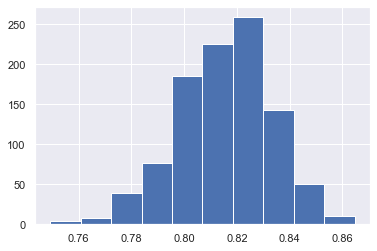

95.0 confidence interval 77.7% and 84.9%


In [55]:
#plot scores Gradient Boosting Regressor
from matplotlib import pyplot
pyplot.hist(stats)
pyplot.show()
alpha = 0.95

p= ((1.0- alpha)/2.0) * 100
lower = max(0.0,np.percentile(stats,p))
p= (alpha + (1.0-alpha)/2.0 ) *100
upper = min(1.0, np.percentile(stats,p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

In [56]:
#df_BST = df2_scaled.copy(deep=True)
#Decision Treee Regressor

values = df_BST.values
n_iterations = 1000
n_size = int(len(df_BST)*1)
print(n_size)

stats2 = list()

for i in range(n_iterations):
    train = resample(values,n_samples=n_size)
    test = np.array([x for x in values if x.tolist() not in train.tolist()])
    model2 = DecisionTreeRegressor()
    model2.fit(train[:,:-1],train[:,-1])
    y_test= test[:,-1]
    score = model2.score(test[:,:-1],y_test)
    predictions = model2.predict(test[:,:-1])
#     predictions = model1.predict(test[:,:-1])
#     score = accuracy_score(test[:,-1],predictions)
    print(score)
    stats2.append(score) 

1005
0.7574552745627885
0.6960317916428629
0.744169878567347
0.7264686099790376
0.7535800124018103
0.7210817739864962
0.7668835878815159
0.6891741689330445
0.636152496206817
0.6296744841730442
0.7329682295399824
0.759889646228775
0.756890673241669
0.7305166106993795
0.7492389684879268
0.7582711089080157
0.756962093274652
0.6578687218787191
0.8012519407363401
0.7307318803078062
0.8110577630201223
0.7885193048263892
0.7885957991101582
0.7034613672498944
0.7104989465489304
0.756138440808937
0.7133429489949986
0.7836145968761125
0.7180413162529861
0.7275817659831743
0.7825301104602086
0.7421262032222077
0.7342051308087529
0.8025650012325116
0.7257961859218307
0.7332338848540136
0.784929636408396
0.7775813517477481
0.7320106442093716
0.7267832666002811
0.7736321899842076
0.7424813260603071
0.7669986148630779
0.6239954887680457
0.7159662129252342
0.7888184798770399
0.7803547528505516
0.6929347821436633
0.7659015065360338
0.7806052763300415
0.709815086970103
0.6670785936137051
0.7233548631827

0.7821027922389154
0.7015728429598591
0.749630044091095
0.7237726522818713
0.7723993127886597
0.7221130268414324
0.776952644499691
0.7519159544120496
0.7798077334216982
0.7599907038398435
0.6724154304022367
0.7351673206770375
0.6750021181778619
0.7586604911986872
0.7290768097652507
0.7474198592636208
0.694735466314311
0.7612481570158978
0.7418662839310672
0.6433182857943025
0.736905932881373
0.7585604253266075
0.7840018200752152
0.6986183245951167
0.7198322328927289
0.7719781272662765
0.7912894117677061
0.7513249565558193
0.7804613856651674
0.7363309908573772
0.7712761725112984
0.7449879848566899
0.7475891722297878
0.8077439539427613
0.7209327507072465
0.7654936487854098
0.7215659715602356
0.7253623700820664
0.7836472782630982
0.7611875854888833
0.7758234052904003
0.7456784995543226
0.6968407412211984
0.7486936972344946
0.6859690476750477
0.7216137454376117
0.6787232977073074
0.6768521018281921
0.6556675293379554
0.7701019577147717
0.7516653962546305
0.7441132731059972
0.75099933450794

0.6951757923787414
0.7606437811383495
0.6625872952878658
0.6806839754000635
0.7890259429969594
0.7437659867580962
0.7560822922908743
0.7625302404458656
0.7216308040394797
0.7157711023580693
0.7290914123993043
0.771889540913682
0.7404595824238536
0.6888128181193545
0.6995937481965778
0.757442310573046
0.7731427694438042
0.7085465835111693
0.6869129181418492
0.776999875374004
0.7656732352149986
0.7834927451931634
0.7386776322400608
0.6649140185877316
0.795146442052181
0.695679669140699
0.7774158090167076
0.7795530907153982
0.7221361294866471
0.7823416835724943
0.6991327975230597
0.7593730241581362
0.7642697706747553
0.7308932547343397
0.7003165600452994
0.673731627239261
0.7656605848667569
0.7322055539709873
0.7180305540386083
0.7947289660690036
0.684721318678882
0.7894117013064728
0.7343118335508915
0.7537309381582054
0.7557303869576818
0.7611578568620779
0.7335132434021179
0.6122081875671319
0.7824097828411187
0.7865479880984823
0.724977327805111
0.7051626634140293
0.7693171694602088
0

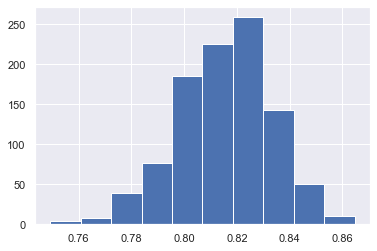

95.0 confidence interval 66.0% and 80.2%


In [57]:
#plot scores Decision Tree Regressor
pyplot.hist(stats)
pyplot.show()
alpha = 0.95

p= ((1.0- alpha)/2.0) * 100
lower = max(0.0,np.percentile(stats2,p))
p= (alpha + (1.0-alpha)/2.0 ) *100
upper = min(1.0, np.percentile(stats2,p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

In [58]:
# RandomForestRegressor
df_BST = df2_scaled.copy(deep=True)

values = df_BST.values
n_iterations = 1000
n_size = int(len(df_BST)*1)
print(n_size)

stats3 = list()

for i in range(n_iterations):
    train = resample(values,n_samples=n_size)
    test = np.array([x for x in values if x.tolist() not in train.tolist()])
    model3 = RandomForestRegressor(n_estimators=50)
    model3.fit(train[:,:-1],train[:,-1])
    y_test= test[:,-1]
    score = model3.score(test[:,:-1],y_test)
    predictions = model3.predict(test[:,:-1])
#     predictions = model1.predict(test[:,:-1])
#     score = accuracy_score(test[:,-1],predictions)
    print(score)
    stats3.append(score)

1005
0.844421971862403
0.8794264489656296
0.8653192556989996
0.8297288894611704
0.8686945080007223
0.8525066433780174
0.8769719123977139
0.8609229034961994
0.8435980056280622
0.8475521456095573
0.8497248342372267
0.8488119022370634
0.8474895469771848
0.8395532371753984
0.8583529444756867
0.8467811247106132
0.8227373247440674
0.844392611073915
0.8637614891691625
0.8647598990293678
0.8291375810407585
0.85517451703742
0.835466660767782
0.8757587036204968
0.8410137014329755
0.826824463846531
0.883170187752578
0.8103016696555227
0.8340608992300593
0.8335105849966988
0.8667582838807115
0.8384582145208979
0.8202579276223831
0.8496569546219331
0.83726735473983
0.8529354125494344
0.8424739289714359
0.8560729331191718
0.8360515120589456
0.8626555678118619
0.8125920431614687
0.8352921457025726
0.8937643275168453
0.8511798587668225
0.8367126838917518
0.8694341975383479
0.8800290566918596
0.8546843390846204
0.8475456669761536
0.8324988781441597
0.8537553084977278
0.835840274938463
0.859066910390468

0.8477555179385196
0.8357298472179591
0.8426802497140958
0.8530020964744955
0.8507044430630545
0.8707116909096828
0.8557104085194727
0.833751902677352
0.8609018006546949
0.8464884594574602
0.8583608371488485
0.8488913749476825
0.8754480242005991
0.883900678424877
0.8817129126106132
0.8487101557872476
0.8334711021203943
0.8671715045881125
0.8140058634021898
0.8644015465220469
0.8639299258201161
0.8422345211382458
0.8416617002454697
0.8550479492229937
0.8564522577846638
0.8557200066971371
0.827809792022576
0.8530963425589069
0.8411782467158532
0.8281898777470322
0.8788874717642087
0.8342929128000068
0.8896197387287994
0.855244868630136
0.8423179321449727
0.8773109727185753
0.8528775732179938
0.8523464101978685
0.8524009717104931
0.813692854233961
0.8378094239415526
0.8745557326036398
0.8390030158846794
0.8337196442408481
0.8849283054078487
0.8262620653511129
0.8816084333109289
0.8577250612386029
0.8571612484231661
0.8365559756923491
0.8348753384503602
0.8349084954264298
0.824656190585755

0.8357363086756426
0.8499793023731026
0.8333738763621469
0.8406145430245827
0.832549581075277
0.8212654225670739
0.8462895341838899
0.8675493610119434
0.8319590362008628
0.8124646432354165
0.8653394619093218
0.8583275754208143
0.8559264261540934
0.8789631829248009
0.8091994204766482
0.8135903738035556
0.8585828265086684
0.864252286713866
0.8682091941238184
0.8250740679227315
0.8459569588290765
0.8542655593215571
0.8396852567394851
0.8371754008147988
0.8453568686839801
0.8482677479750944
0.8542999409794386
0.819938769211978
0.8600033923067111
0.812426171447022
0.8620810760624577
0.8689889992845248
0.8335255949064933
0.8283238805958145
0.8704764886479257
0.86388696156639
0.8554151680120119
0.878749056175877
0.8059196755272919
0.8153605723413893
0.7936447510174668
0.8603723916423694
0.8436449014132549
0.828694782373748
0.8343166491528292
0.8787746628000401
0.8340764967868146
0.8468567190831087
0.8375240314023308
0.8384671776225678
0.8341947984267084
0.8729349912251875
0.8672579830776829
0

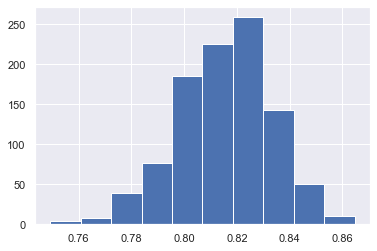

95.0 confidence interval 80.2% and 88.2%


In [61]:
#plot scores Random Forest Regressor
pyplot.hist(stats)
pyplot.show()
alpha = 0.95

p= ((1.0- alpha)/2.0) * 100
lower = max(0.0,np.percentile(stats3,p))
p= (alpha + (1.0-alpha)/2.0 ) *100
upper = min(1.0, np.percentile(stats3,p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

By looking at 95% confidence interval distribution for RandomForestRegressor, we can see that model performace is likely to be in the range of 80% to 88%.